In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

In [ ]:
# collect subjects and their files
root_fpath = "/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/Formants/subject_wise"

subjects_formants = {}
for path, subdirs, files in os.walk(root_fpath):
    for name in files:
        fpath = os.path.join(path, name)
        
        if ("_formantSTRP_" in name) :
            sub_id = name.split("_")[0]

            if sub_id in subjects_formants.keys() :
                subjects_formants[sub_id].append(fpath) 
            else :
                subjects_formants[sub_id] = [fpath]   
        

print(len(subjects_formants.keys()))

42


In [ ]:
len(subjects_formants["4012"])
subjects_formants["4012"]
os.path.basename(subjects_formants["4012"][0])

'4012_P_Asthma_F_after_Mil_Y_Eee_1_5_formantSTRP_.txt'

In [ ]:
import pandas as pd
import numpy as np

import re
import difflib

In [ ]:
# test : ignore

d = difflib.ndiff("4012_P_Asthma_F_after_Mil_Y_Eee_1_5_formantSTRP_.txt", "4012_P_Asthma_F_after_Mil_Y_1_5_formantSTRP_.txt" )
list(d)

d2 = [li[-1] for li in difflib.ndiff("4012_P_Asthma_F_after_Mil_Y_Eee_1_5_formantSTRP_.txt", "4012_P_Asthma_F_after_Mil_Y_1_5_formantSTRP_.txt" ) if li[0] != ' ']

print("".join(d2))



Eee_


In [ ]:
print(list(d))

[]


In [ ]:
list(d)

[]

In [ ]:
# subject formants dataframes

subjects_files = {}

for sub in subjects_formants.keys() :
    for f in subjects_formants[sub]:
        fname = os.path.basename(f)
        formants = pd.read_csv(
            f, 
            sep="\t",
            header=None, 
            usecols=[0, 1], 
            names=['f1', 'f2']
            )
       
        fparts = re.split(r"_Aaa_|_Eee_|_Uuu_", fname)
        fdiff = "_".join(fparts)
        fp = fparts[0]

        stim = "".join(
            [li[-1] for li in difflib.ndiff(fname, fdiff ) if li[0] != ' ']
            ).replace("_", "")
            
        # print(fp, stim)

        if fp in subjects_files.keys() :
            subjects_files[fp][stim] = formants
        else :
            subjects_files[fp] = { f"{stim}": formants }

    
        
subjects_files['4012_P_Asthma_F_after_Mil_Y']


{'Aaa':            f1           f2
 0  596.946199  1212.857771
 1  597.498348  1185.180812
 2  595.564284  1189.049671
 3  615.570593  1203.806335
 4  613.069529  1161.182985, 'Eee':            f1           f2
 0  289.064716  1898.272980
 1  303.210946  2265.648813
 2  297.840068  1899.105196
 3  298.698386  1964.242427
 4  301.001111  2042.841685, 'Uuu':            f1           f2
 0  395.617824  1007.670413
 1  433.196574  1218.794565
 2  383.841782  1126.627251
 3  412.119398  1081.021531
 4  464.751361  1176.662222
 5  409.970397  1117.964636}

In [ ]:
len(subjects_files.keys())

48

In [ ]:
# create data points

a, e, u = ["Aaa", "Eee", "Uuu"]

all_data_points = []
for subf in subjects_files.keys() :
    formants = subjects_files[subf]

    # print(subf)

    if a in formants.keys() :   
        aaa_f1 = formants[a]["f1"].to_list()
        aaa_f2 = formants[a]["f2"].to_list()
    else :
        aaa_f1 = []
        aaa_f2 = []
    
    if a in formants.keys() : 
        eee_f1 = formants[e]["f1"].to_list()
        eee_f2 = formants[e]["f2"].to_list()
    else :
        eee_f1 = []
        eee_f2 = []
    
    if u in formants.keys() :
        uuu_f1 = formants[u]["f1"].to_list()
        uuu_f2 = formants[u]["f2"].to_list()
    else :
        uuu_f1 = []
        uuu_f2 = []

    min_len = np.min([len(aaa_f1), len(eee_f1), len(uuu_f1)])

    
    for i in range(min_len) :

        sub_id = subf.split("_")[0]

        file_id = subf

        a1 = (aaa_f1[i])
        a2 = (aaa_f2[i])

        e1 = (eee_f1[i])
        e2 = (eee_f2[i])

        u1 = (uuu_f1[i])
        u2 = (uuu_f2[i])

        tra = tiar(a1, a2, e1, e2, u1, u2)

        all_data_points.append([sub_id, file_id, a1, a2, e1, e2, u1, u2, tra])

for d in all_data_points[:5] :
    print(d)


['4012', '4012_P_Asthma_F_after_Mil_Y', 596.9461990768783, 1212.8577713677162, 289.06471637354144, 1898.2729797778256, 395.6178244721053, 1007.6704130383088, 100583.45897651892]
['4012', '4012_P_Asthma_F_after_Mil_Y', 597.4983476456792, 1185.1808118501374, 303.2109457701268, 2265.648812517409, 433.1965736706916, 1218.794564958221, 83815.3525816884]
['4012', '4012_P_Asthma_F_after_Mil_Y', 595.5642844630597, 1189.049671436368, 297.84006805210845, 1899.1051955187704, 383.84178241654763, 1126.6272505781658, 84459.69924357827]
['4012', '4012_P_Asthma_F_after_Mil_Y', 615.5705933640184, 1203.8063347878979, 298.6983861828791, 1964.242426507841, 412.11939844516996, 1081.0215305917354, 96809.36171689158]
['4012', '4012_P_Asthma_F_after_Mil_Y', 613.0695290845375, 1161.1829846317708, 301.00111078823323, 2042.84168493568, 464.7513611044697, 1176.6622215439825, 62967.7111165679]


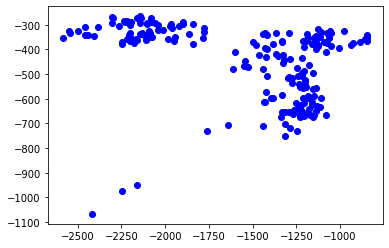

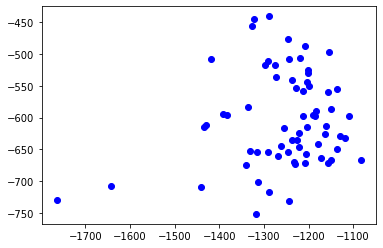

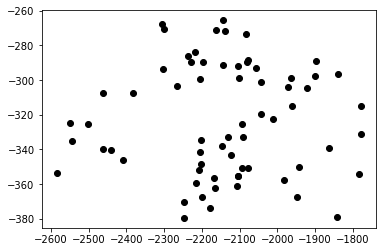

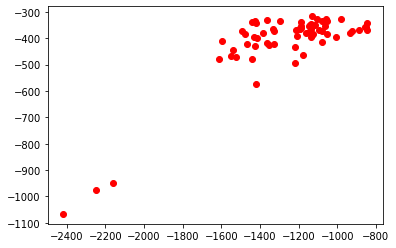

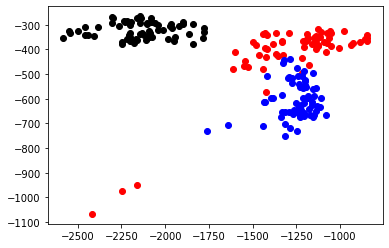

In [ ]:
for d in all_data_points :
    subf, a1, a2, e1, e2, u1, u2, tra = d
    fplot(a1, a2, e1, e2, u1, u2)
plt.show()
    
for d in all_data_points :
    subf, a1, a2, e1, e2, u1, u2, tra = d
    fplotA(a1, a2, e1, e2, u1, u2)
plt.show()

for d in all_data_points :
    subf, a1, a2, e1, e2, u1, u2, tra = d
    fplotE(a1, a2, e1, e2, u1, u2)
plt.show()
    
for d in all_data_points :
    subf, a1, a2, e1, e2, u1, u2, tra = d
    fplotU(a1, a2, e1, e2, u1, u2)
plt.show()

for d in all_data_points :
    subf, a1, a2, e1, e2, u1, u2, tra = d

    fplotA(a1, a2, e1, e2, u1, u2)
    fplotE(a1, a2, e1, e2, u1, u2)
    fplotU(a1, a2, e1, e2, u1, u2)

        
plt.show()


In [ ]:
print("files", len(all_data_points))

exp_path = "/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/tiar_data3.tsv"

tiar_data = pd.DataFrame(all_data_points, columns=["sub_id", "file_id", "fa1", "fa2", "fe1", "fe2", "fu1", "fu2", "tiar"])
tiar_data.to_csv(exp_path, sep="\t", index=False)
tiar_data

files 208


,sub_id,file_id,fa1,fa2,fe1,fe2,fu1,fu2,tiar
0,4012,4012_P_Asthma_F_after_Mil_Y,596.946199,1212.857771,289.064716,1898.272980,395.617824,1007.670413,100583.458977
1,4012,4012_P_Asthma_F_after_Mil_Y,597.498348,1185.180812,303.210946,2265.648813,433.196574,1218.794565,83815.352582
2,4012,4012_P_Asthma_F_after_Mil_Y,595.564284,1189.049671,297.840068,1899.105196,383.841782,1126.627251,84459.699244
3,4012,4012_P_Asthma_F_after_Mil_Y,615.570593,1203.806335,298.698386,1964.242427,412.119398,1081.021531,96809.361717
4,4012,4012_P_Asthma_F_after_Mil_Y,613.069529,1161.182985,301.001111,2042.841685,464.751361,1176.662222,62967.711117
...,...,...,...,...,...,...,...,...,...
203,4246,4246_P_Asthma_F_after_TBD_Y,589.443266,1083.699670,381.082900,2673.222959,466.345109,1064.341922,99850.387641
204,4246,4246_P_Asthma_F_after_TBD_Y,573.403766,1069.097793,375.018748,2660.230803,447.931213,1203.565142,86483.606323
205,4246,4246_P_Asthma_F_after_TBD_Y,526.599217,1259.612899,367.391935,2480.110491,460.147703,1097.668302,53443.335982
206,4246,4246_P_Asthma_F_after_TBD_Y,483.343740,1075.803451,365.634390,2437.303718,456.647985,1090.972943,17280.343479


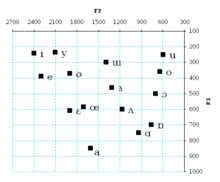

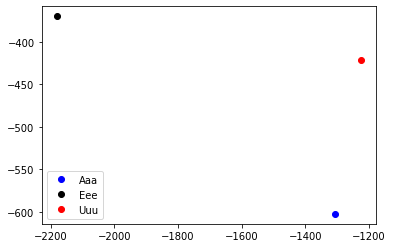

mean tiar: 88573.13659859385


In [ ]:
fa1_mean = tiar_data["fa1"].mean()
fa2_mean = tiar_data["fa2"].mean()
fe1_mean = tiar_data["fe1"].mean()
fe2_mean = tiar_data["fe2"].mean()
fu1_mean = tiar_data["fu1"].mean()
fu2_mean = tiar_data["fu2"].mean()


fplotA(fa1_mean, fa2_mean, fe1_mean, fe2_mean, fu1_mean, fu2_mean)
fplotE(fa1_mean, fa2_mean, fe1_mean, fe2_mean, fu1_mean, fu2_mean)
fplotU(fa1_mean, fa2_mean, fe1_mean, fe2_mean, fu1_mean, fu2_mean)

plt.legend(loc="lower left")
plt.show()


f_mean = [fa1_mean, fa2_mean, fe1_mean, fe2_mean, fu1_mean, fu2_mean]

# print(f_mean)

print("mean tiar:", tiar(fa1_mean, fa2_mean, fe1_mean, fe2_mean, fu1_mean, fu2_mean))


In [ ]:
# tests : strip white space in formants table
root_fpath = "/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/Formants/subject_wise"

for path, subdirs, files in os.walk(root_fpath):
    for name in files:

        if ("_formant_" in name) :
            fpath = os.path.join(path, name)
            with open(fpath, mode="r") as f :
                lines = f.readlines()

                nw_lines = [l.lstrip() for l in lines]
                nw_lines = ["\t".join(l.split(" ")[:2]) + "\n" for l in nw_lines if not l == '']

                nw_fpath = fpath = os.path.join(path, name.replace("_formant_", "_formantSTRP_"))
                with open(nw_fpath, mode="w") as nf :
                    txt = "".join(nw_lines)
                    nf.write(txt)

                    print(txt)
            

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def tiar(fa1, fa2, fi1, fi2, fu1, fu2) :
    d = np.linalg.det(
        [[fa1, fa2, 1],
         [fi1, fi2, 1],
         [fu1, fu2, 1]]
         )
    return np.abs(d * 0.5)

def fplot(fa1, fa2, fi1, fi2, fu1, fu2) :
    y = np.array([fa1, fi1, fu1]) * -1
    x = np.array([fa2, fi2, fu2]) * -1

    plt.plot(x, y, 'bo')

def fplotA(fa1, fa2, fi1, fi2, fu1, fu2) :
    y = np.array([fa1 ]) * -1
    x = np.array([fa2 ]) * -1
    plt.plot(x, y, 'bo', color="blue", label="Aaa")

def fplotE(fa1, fa2, fi1, fi2, fu1, fu2) :
    y = np.array([ fi1 ]) * -1
    x = np.array([ fi2 ]) * -1

    plt.plot(x, y, 'bo', color="black", label="Eee")

def fplotU(fa1, fa2, fi1, fi2, fu1, fu2) :
    y = np.array([ fu1]) * -1
    x = np.array([ fu2]) * -1

    plt.plot(x, y, 'bo', color="red", label="Uuu")

In [ ]:
import os
import pandas as pd
import numpy as np


formants_path = "/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/d/formants"
files = os.listdir(formants_path)

formantsd = {}
for f in files :
    fp = os.path.join(formants_path, f)
    formants = pd.read_csv(
                fp, 
                sep="\t",
                header=None, 
                usecols=[0, 1], 
                names=['f1', 'f2']
                )
    formantsd[f] = formants
    print(f)
    print(formants)

j_aa.txt
           f1           f2
0  686.631486  1286.091845
1  682.880378  1227.070172
2  693.785300  1249.589562
3  688.533143  1213.336744
4  691.705424  1219.661632
5  689.797484  1267.567582
j_ee.txt
           f1           f2
0  322.338633  2261.320792
1  331.247640  2188.759206
2  323.789968  2257.740501
3  337.776385  2261.054213
4  319.096490  2235.639758
j_uu.txt
           f1           f2
0  376.899267   985.943403
1  395.093396   966.735973
2  405.785609  1096.980325
3  442.006066  1087.629289
4  417.468300   998.269615
j_oo.txt
           f1          f2
0  417.199287  969.263998
1  446.575694  890.957034
2  440.466035  874.780640
3  468.047114  837.041301
4  451.324309  884.570475


In [ ]:
aaa_f1 = formantsd["j_aa.txt"]["f1"].to_list()
aaa_f2 = formantsd["j_aa.txt"]["f2"].to_list()

eee_f1 = formantsd["j_ee.txt"]["f1"].to_list()
eee_f2 = formantsd["j_ee.txt"]["f2"].to_list()

uuu_f1 = formantsd["j_uu.txt"]["f1"].to_list()
uuu_f2 = formantsd["j_uu.txt"]["f2"].to_list()

min_len = np.min([len(aaa_f1), len(eee_f1), len(uuu_f1)])

all_data_pointsj = []

for i in range(min_len) :

    sub_id = "j777"

    file_id = f"jjjj{i}"

    a1 = (aaa_f1[i])
    a2 = (aaa_f2[i])

    e1 = (eee_f1[i])
    e2 = (eee_f2[i])

    u1 = (uuu_f1[i])
    u2 = (uuu_f2[i])

    tra = tiar(a1, a2, e1, e2, u1, u2)

    all_data_pointsj.append([sub_id, file_id, a1, a2, e1, e2, u1, u2, tra])

for d in all_data_pointsj[:5] :
    print(d)

print("files", len(all_data_pointsj))

exp_path = "/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/tiar_jdata.tsv"

tiar_data = pd.DataFrame(all_data_pointsj, columns=["sub_id", "file_id", "fa1", "fa2", "fe1", "fe2", "fu1", "fu2", "tiar"])
tiar_data.to_csv(exp_path, sep="\t", index=False)
tiar_data

['j777', 'jjjj0', 686.6314862609181, 1286.0918452835567, 322.33863290056337, 2261.3207917933787, 376.8992665163217, 985.9434032649074, 205700.87936815523]
['j777', 'jjjj1', 682.8803778294612, 1227.0701720099025, 331.24763973510807, 2188.7592056827925, 395.093396444324, 966.7359729091608, 184151.80564065222]
['j777', 'jjjj2', 693.7852996018986, 1249.5895620836286, 323.78996833668725, 2257.7405006715608, 405.7856085729069, 1096.980325395592, 173405.9319532169]
['j777', 'jjjj3', 688.5331432798395, 1213.33674413391, 337.77638501837777, 2261.054213206109, 442.00606622234596, 1087.6292889599817, 151191.73234927465]
['j777', 'jjjj4', 691.7054236031261, 1219.6616320325431, 319.09648965700296, 2235.639757681234, 417.46830017513946, 998.269614585748, 180555.7811243432]
files 5


,sub_id,file_id,fa1,fa2,fe1,fe2,fu1,fu2,tiar
0,j777,jjjj0,686.631486,1286.091845,322.338633,2261.320792,376.899267,985.943403,205700.879368
1,j777,jjjj1,682.880378,1227.070172,331.247640,2188.759206,395.093396,966.735973,184151.805641
2,j777,jjjj2,693.785300,1249.589562,323.789968,2257.740501,405.785609,1096.980325,173405.931953
3,j777,jjjj3,688.533143,1213.336744,337.776385,2261.054213,442.006066,1087.629289,151191.732349
4,j777,jjjj4,691.705424,1219.661632,319.096490,2235.639758,417.468300,998.269615,180555.781124


In [ ]:
formants_path = "/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/d/formants"

files = os.listdir(formants_path)

print(files)

for f in files :
    fp = os.path.join(formants_path, f)

    nw_con = ""
    with open(fp, mode="r") as f :
        for l in f :
            nwl = l.lstrip().rstrip().split(' ')
            # print(nwl)
            if len(nwl) > 1 :
                ll = "\t".join(nwl) + "\n"
                nw_con = nw_con + ll
                # print(ll)
        print(nw_con)

    print(f)
    with open(fp, mode="w") as f :
        f.write(nw_con)
# 

['j_aa.txt', 'j_ee.txt', 'j_uu.txt', 'j_oo.txt']
686.6314862609181	1286.0918452835567
682.8803778294613	1227.0701720099023
693.7852996018986	1249.5895620836288
688.5331432798395	1213.3367441339099
691.7054236031261	1219.6616320325431
689.7974838497076	1267.5675823665924

<_io.TextIOWrapper name='/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/d/formants/j_aa.txt' mode='r' encoding='UTF-8'>
322.33863290056337	2261.3207917933782
331.24763973510807	2188.7592056827925
323.78996833668725	2257.7405006715608
337.77638501837777	2261.054213206109
319.09648965700296	2235.639757681234

<_io.TextIOWrapper name='/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/d/formants/j_ee.txt' mode='r' encoding='UTF-8'>
376.8992665163217	985.9434032649074
395.09339644432396	966.7359729091608
405.7856085729069	1096.980325395592
442.006066222346	1087.6292889599817
417.4683001751395	998.2696145857481

<_io.TextIOWrapper name='/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/d/formants/j_uu.tx

['j777', 'jjjj0', 686.6314862609181, 1286.0918452835567, 322.33863290056337, 2261.3207917933787, 376.8992665163217, 985.9434032649074, 205700.87936815523]
['j777', 'jjjj1', 682.8803778294612, 1227.0701720099025, 331.24763973510807, 2188.7592056827925, 395.093396444324, 966.7359729091608, 184151.80564065222]
['j777', 'jjjj2', 693.7852996018986, 1249.5895620836286, 323.78996833668725, 2257.7405006715608, 405.7856085729069, 1096.980325395592, 173405.9319532169]
['j777', 'jjjj3', 688.5331432798395, 1213.33674413391, 337.77638501837777, 2261.054213206109, 442.00606622234596, 1087.6292889599817, 151191.73234927465]
['j777', 'jjjj4', 691.7054236031261, 1219.6616320325431, 319.09648965700296, 2235.639757681234, 417.46830017513946, 998.269614585748, 180555.7811243432]


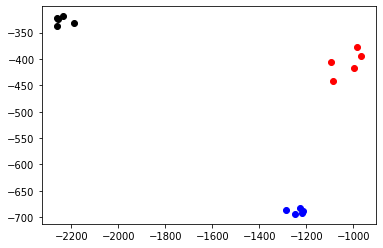

In [ ]:
for d in all_data_pointsj :
    print(d)
    subf, id, a1, a2, e1, e2, u1, u2, tra = d

    fplotA(a1, a2, e1, e2, u1, u2)
    fplotE(a1, a2, e1, e2, u1, u2)
    fplotU(a1, a2, e1, e2, u1, u2)

        
plt.show()